In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [29]:
# Read the Data

true_df = pd.read_csv('true.csv')
fake_df = pd.read_csv('fake.csv')

true_df = true_df.drop(columns=['title', 'subject', 'date'])
fake_df = fake_df.drop(columns=['title', 'subject', 'date'])

In [30]:
# Clean the Data and join into one dataset

true_df['text'] = true_df['text'].str.replace('Reuters', '')
true_df['label'] = 0
fake_df['label'] = 1

df = pd.concat([true_df, fake_df])
df = df.drop_duplicates(subset=['text'])
df = df.dropna(subset=['text'])
df = df.sample(frac=1)
df.index = range(len(df))

In [31]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Convert the text into vectors or numerical values using TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

### `Output for Various Algorithms`

Accuracy: 98.2018%


<AxesSubplot:>

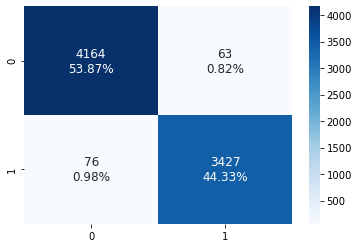

In [33]:
# Train the model (Passive Aggressive Classifier)

model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train, y_train)

y_pred = model.predict(tfidf_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy * 100, 4)}%')


cm = confusion_matrix(y_test, y_pred)
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percents = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = np.asarray([f'{i}\n{j}' for i, j in zip(counts, percents)]).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', annot_kws={'size': 12}, cmap='Blues')

Accuracy: 91.63%


<AxesSubplot:>

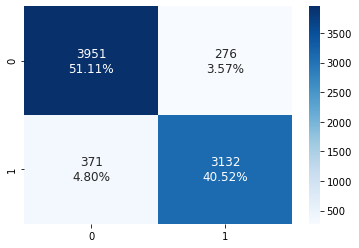

In [34]:
# Train the model (Decision Tree Classifier)

model = DecisionTreeClassifier()
model.fit(tfidf_train, y_train)

y_pred = model.predict(tfidf_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy * 100, 4)}%')

cm = confusion_matrix(y_test, y_pred)
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percents = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = np.asarray([f'{i}\n{j}' for i, j in zip(counts, percents)]).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', annot_kws={'size': 12}, cmap='Blues')

Accuracy: 96.3907%


<AxesSubplot:>

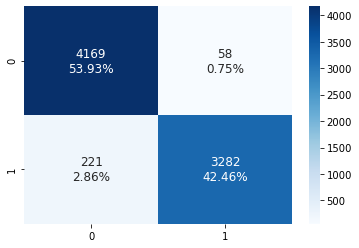

In [35]:
# Train the model (Random Forest Classifier)

model = RandomForestClassifier()
model.fit(tfidf_train, y_train)

y_pred = model.predict(tfidf_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy * 100, 4)}%')

cm = confusion_matrix(y_test, y_pred)
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percents = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = np.asarray([f'{i}\n{j}' for i, j in zip(counts, percents)]).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', annot_kws={'size': 12}, cmap='Blues')

Accuracy: 97.7232%


<AxesSubplot:>

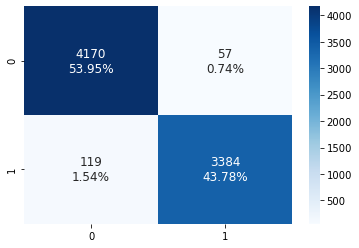

In [36]:
# Train the model (Logistic Regression)

model = LogisticRegression()
model.fit(tfidf_train, y_train)

y_pred = model.predict(tfidf_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy * 100, 4)}%')

cm = confusion_matrix(y_test, y_pred)
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percents = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = np.asarray([f'{i}\n{j}' for i, j in zip(counts, percents)]).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', annot_kws={'size': 12}, cmap='Blues')

Accuracy: 98.3441%


<AxesSubplot:>

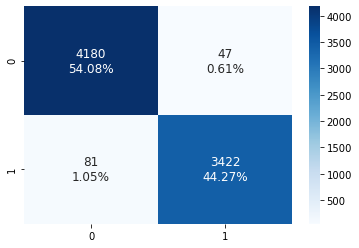

In [37]:
# Train the model (Support Vector Machines)

model = SVC(kernel='linear')
model.fit(tfidf_train, y_train)

y_pred = model.predict(tfidf_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy * 100, 4)}%')

cm = confusion_matrix(y_test, y_pred)
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percents = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = np.asarray([f'{i}\n{j}' for i, j in zip(counts, percents)]).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', annot_kws={'size': 12}, cmap='Blues')